# ASSIGNMENT 1
SUBMITTED BY - SHIVANI GOYAL<BR>
R00183301

## INTRODUCTION
The provided dataset is the collection of spam and non-spam emails which is collected from the Enron Coorporation emails available on the web.<br>
The dataset is the text data which contains two folders of spam and ham(non-spam) emails such that 1500 files are collection of spam emails and 3672 of ham emails.<br>
The main motive of this project is to classify the spam or non-spam emails using machine learning algorithms which includes the supervised classification models.

## Importing Libraries and Install Packages

In [100]:
import os
import re
from collections import Counter
import math
import pandas as pd
import string 
from nltk import stem
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

[nltk_data] Downloading package stopwords to C:\Users\pallavi
[nltk_data]     goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\pallavi
[nltk_data]     goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Path Configuration

In [101]:
hamPath = 'ham/'  #giving path of ham files directory and storing in variable hamPath 
spamPath = 'spam/' #giving path of spam files directory and storing in variable spamPath

listing_ham = os.listdir(hamPath)  #reading the ham files and storing as list
listing_spam = os.listdir(spamPath) #reading the spam files and storing as list

hamList, spamList = [], []

#reading all the messages of ham mails and storing as list in hamList
for file in listing_ham:    
    f = open(hamPath + file, "r", encoding="utf8", errors="ignore")
    file_words = f.read()
    hamList.append(file_words)
    f.close()

#reading all the messages of spam mails and storing as list in spamList    
for file in listing_spam:
    f = open(spamPath + file, "r", encoding="utf8", errors="ignore")
    file_words = f.read()
    spamList.append(file_words)
    f.close()

#creating the dataframe df_ham such that column of 'Messages' consist text data and 'Type' is '0'      
df_ham = pd.DataFrame({'Messages': hamList})
df_ham['Type'] = 0

#creating the dataframe df_spam such that column of 'Messages' consist text data and 'Type' is '1'
df_spam = pd.DataFrame({'Messages': spamList})
df_spam['Type'] = 1

#merging the dataframe of df_ham and df_spam
df_all_mail = pd.concat([df_spam, df_ham])

print(df_all_mail)


                                               Messages  Type
0     Subject: dobmeos with hgh my energy level has ...     1
1     Subject: your prescription is ready . . oxwq s...     1
2     Subject: get that new car 8434\npeople nowthe ...     1
3     Subject: await your response\ndear partner ,\n...     1
4     Subject: coca cola , mbna america , nascar par...     1
...                                                 ...   ...
3667  Subject: re : tenaska iv\ni ' ll call you on t...     0
3668  Subject: generic contract\nhi daren ,\nsorry f...     0
3669  Subject: re : contracts and credit\nthanks - -...     0
3670  Subject: re : tenaska iv\nok , since we don ' ...     0
3671  Subject: re : tenaska iv\ni tried calling you ...     0

[5172 rows x 2 columns]


In [102]:
#displays the count of ham and spam mails
df_all_mail.Type.value_counts()
#3672 ham and 1500 spam

0    3672
1    1500
Name: Type, dtype: int64

In [103]:
#gives the number of null values
df_all_mail.isna().sum()
# no null values found

Messages    0
Type        0
dtype: int64

In [104]:
# to remove duplicate rows
df_all_mail.drop_duplicates(inplace = True)
df_all_mail.Type.value_counts()
#3531 ham & 1463 spam

0    3531
1    1463
Name: Type, dtype: int64

In [105]:
#shuffling the rows
df_all_mail = df_all_mail.sample(frac=1).reset_index(drop=True)
df_all_mail.head()

,Messages,Type
0,Subject: fw : pymt for 03 / 01 sales adjustmen...,0
1,Subject: eol deal ids in path manager\nthought...,0
2,Subject: re : nom / actual for may 2 nd\nwe ag...,0
3,Subject: mobil chemical - pasadena - hpl meter...,0
4,Subject: free mortgage quotes\nyou want to fre...,1


In [106]:
df_msg = df_all_mail['Messages']  #store the 'Messages' column data to df_msg variable
df_type = df_all_mail['Type']  #store the 'Type' column data to df_type variable
df_msg #displays the message column data

0       Subject: fw : pymt for 03 / 01 sales adjustmen...
1       Subject: eol deal ids in path manager\nthought...
2       Subject: re : nom / actual for may 2 nd\nwe ag...
3       Subject: mobil chemical - pasadena - hpl meter...
4       Subject: free mortgage quotes\nyou want to fre...
                              ...                        
4989    Subject: epgt\nmike :\ni am down to the last f...
4990    Subject: re : ami chokshi resigns\ni have an e...
4991    Subject: ces - duke en field services\nthe pur...
4992    Subject: i will be in dallas meeting with tufc...
4993    Subject: cleburne\ndaren & john ,\nsee the att...
Name: Messages, Length: 4994, dtype: object

The dataframe 'df_all_mail' has total 5172 rows from which 1500 are spam and 3672 are non-spam data. <br>It does not contain any null values.<br>
Also, checked for duplicate rows. After removing duplicate rows, the count of ham and spam rows are 3531 and 1463 respectively.
<br><br><b>IMBALANCED DATA</b> This occurs when samples from one class or from multiple classes are over-represented in a dataset. As this is the case in our dataset.The proportion of non-spam mails are comparitively higher than spam mails which leads to the imbalance of data. <br>
However, there are a wide range of approaches to dealing with this issue the
most common is applying common techniques of sampling that attempts to equal the
distribution. <br/><br>Some of the common approaches are :<br>
1)Random Under Sampling - Removes data randomly from the majority class to balance the both classes. However, this could lead to loss of the important data. <br>
2)Random Over Sampling - It gradually increases the size of minority class. This may lead to overfitting.<br>
3)SMOTE(Synthetic Minority Over-sampling Technique) is an oversampling
technique that allows to create new artificial data points in the dataset. <br>
<BR>Here, used different approach to deal with the imbalanced data is that before splitting the dataset into training and test set has shuffled the data because while using SMOTE technique error occured. "ERROR - ModuleNotFoundError: No module named 'imblearn' ".

## Task 1 - Preprocessing

### Cleaning The Dataset & Feature Extraction

This includes - <br>a) Removing punctuations 
            <br>b) Lowering all the texts <br>
                c) Text Normalising using Stemming Technique<br>
                d) Removing Stopwords which includes frequently used words like "the", "a", "for" etc. <br>
                e) Removing words with length smaller than 3 letters <br>
                f) Removing Digits <br>
                g) Correcting Letter Repetition <br>
                h) Removing rarely occured words

The below function covers first three point of data cleaning.

In [107]:
#creates function of text cleaning which removes punctuations,lowers the text data and normalises the text
def textCleaning(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') #removes punctuation marks
    
    text = text.lower() #lowercase the all text 
    text = text.replace('[^\w\s]+',' ') #removes the extra whitespaces

    stemmer = stem.SnowballStemmer("english")
    text = "".join([stemmer.stem(word) for word in text]) #text normalisation
    
    return text

In [108]:
df_msg1 = df_msg.apply(textCleaning) #apply textCleaning function to df_msg
df_msg1[1] #displays the first index message


'subject eol deal ids in path manager\nthought you might want to see this \n                      forwarded by edward terry  hou  ect on 02  21  2001 09  19\nam                           \nfrom  matt pena  enron  enronxgate on 02  21  2001 09  11 am\nto  edward terry  hou  ect  ect  george f smith  hou  ect  ect  patti\nsullivan  hou  ect  ect  katherine l kelly  hou  ect  ect  robert\nsuperty  hou  ect  ect  victor lamadrid  hou  ect  ect  beverly beaty  hou  ect  ect \ndonna greif  hou  ect  ect  richard pinion  hou  ect  ect\ncc  chris schomer  enron  enronxgate  brian ripley  enron  enronxgate  bob m\nhall  na  enron  enron  bryce baxter  hou  ect  ect\nsubject  eol deal ids in path manager\nas you  re aware  we  re having to bridge houston street ids into unify from\nsitara \nwe are being asked  as a requirement  to not display the eol id on statements\nthat are identified as  broker eol trade  deals originating from eol  we\nhave two options to accomodate this requirement \noptio

<b>TEXT NORMALISATION</b> <br>This could be achieved by Stemming and Lemmitizing approach. This is the part of 
    pre-processing. Stemming stems the word i.e. it removes prefixes or suffixes means removes inflection from 
    the words to change it into its root form.<br>
    Here, used Python NLTK SnowballStemmers. It is one of non-english stemmer. It supports many languages
    like English, French, German,Dutch and many more. One can program their own language stemmer using snowball.

<b>STOPWORDS</b><br>
The next step is to remove the stopwords because they does not add much meaning to a sentence. 
They can safely be ignored without loosing the meaning of the sentence.Mostly they are words that are commonly used in the English language such as 'as, the, be, are' etc.

In [109]:
stop = stopwords.words('english')

df_msg1 = df_msg1.apply(lambda x: " ".join(x for x in x.split() if x not in stop and len(x)>3))
# remove stop words and words with length smaller than 3 letters

df_msg1[1] #displays the first index message

'subject deal path manager thought might want forwarded edward terry 2001 matt pena enron enronxgate 2001 edward terry george smith patti sullivan katherine kelly robert superty victor lamadrid beverly beaty donna greif richard pinion chris schomer enron enronxgate brian ripley enron enronxgate hall enron enron bryce baxter subject deal path manager aware bridge houston street unify sitara asked requirement display statements identified broker trade deals originating options accomodate requirement option modify bridge code bridge deal deal broker trade deal drawbacks option able referenence path manager related deals deals deal applicable would show statements populated option modify several areas code settlements area time consuming obvious code change would statement generation area well report type information option allows greatest flexibility option quicker implement please pass along others group feedback please share thoughts attached email explaining broker trades confused brok

In [110]:
# Correcting Letter Repetition
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [111]:
df_msg1 = df_msg1.apply(lambda x: " ".join(de_repeat(x) for x in x.split()))
df_msg1[1] #displays the first index message

'subject deal path manager thought might want forwarded edward terry 2001 matt pena enron enronxgate 2001 edward terry george smith patti sullivan katherine kelly robert superty victor lamadrid beverly beaty donna greif richard pinion chris schomer enron enronxgate brian ripley enron enronxgate hall enron enron bryce baxter subject deal path manager aware bridge houston street unify sitara asked requirement display statements identified broker trade deals originating options accomodate requirement option modify bridge code bridge deal deal broker trade deal drawbacks option able referenence path manager related deals deals deal applicable would show statements populated option modify several areas code settlements area time consuming obvious code change would statement generation area well report type information option allows greatest flexibility option quicker implement please pass along others group feedback please share thoughts attached email explaining broker trades confused brok

In [112]:
#removing digits
df_msg1 = df_msg1.str.replace('\d+', ' ')
df_msg1[1] #displays the first index message

'subject deal path manager thought might want forwarded edward terry   matt pena enron enronxgate   edward terry george smith patti sullivan katherine kelly robert superty victor lamadrid beverly beaty donna greif richard pinion chris schomer enron enronxgate brian ripley enron enronxgate hall enron enron bryce baxter subject deal path manager aware bridge houston street unify sitara asked requirement display statements identified broker trade deals originating options accomodate requirement option modify bridge code bridge deal deal broker trade deal drawbacks option able referenence path manager related deals deals deal applicable would show statements populated option modify several areas code settlements area time consuming obvious code change would statement generation area well report type information option allows greatest flexibility option quicker implement please pass along others group feedback please share thoughts attached email explaining broker trades confused broker dea

In [113]:
#finds top 10,000 rarest words
freq = pd.Series(' '.join(df_msg1).split()).value_counts()[-10000:]

# Removes rarely appeared data
freq = list(freq.index)
df_msg1 = df_msg1.apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_msg1[1] #displays the first index message

'subject deal path manager thought might want forwarded edward terry matt pena enron enronxgate edward terry george smith patti sullivan katherine kelly robert superty victor lamadrid beverly beaty donna greif richard pinion chris schomer enron enronxgate brian ripley enron enronxgate hall enron enron bryce baxter subject deal path manager aware bridge houston street unify sitara asked requirement display statements identified broker trade deals originating options accomodate requirement option modify bridge code bridge deal deal broker trade deal drawbacks option able referenence path manager related deals deals deal applicable would show statements populated option modify several areas code settlements area time consuming obvious code change would statement generation area well report type information option allows greatest flexibility option quicker implement please pass along others group feedback please share thoughts attached email explaining broker trades confused broker deals d

### Training and Test Splits

Splitted the data into training and test set such that training set consists 70% of the data and 30% to test set. 

In [114]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
type_train, type_test, msg_train, msg_test = train_test_split(df_type, df_msg1, test_size=0.3, random_state=2, shuffle=True)

In [115]:
msg_train.head() #displays the head of training message datacolumn

614     subject ciallis softabs onlly ayfy ialis softa...
2555    subject product cialis soft tabs product offer...
1161    subject sitara desk request cleburne response ...
827     subject meter arthur refinery chevron daren re...
3828    subject production sitara deals needed vance d...
Name: Messages, dtype: object

In [116]:
type_train.value_counts() #displays the count of ham and spam data in training set

0    2468
1    1027
Name: Type, dtype: int64

In [117]:
# displays the count of ham and spam data in test set
type_test.value_counts()


0    1063
1     436
Name: Type, dtype: int64

Test set contains 1063 ham data rows and 436 spam data. While Training dataset contains 2468 ham and 1027 spam mails.

## TASK 2 - EXPLORATORY DATA ANALYSIS

In [118]:
#merge the training set message and type data to create 'trainingData' dataframe
trainingData = pd.concat([msg_train, type_train],axis=1)
trainingData #dispalys dataframe

,Messages,Type
614,subject ciallis softabs onlly ayfy ialis softa...,1
2555,subject product cialis soft tabs product offer...,1
1161,subject sitara desk request cleburne response ...,0
827,subject meter arthur refinery chevron daren re...,0
3828,subject production sitara deals needed vance d...,0
...,...,...
3335,subject conoco katy tailgate contract sitara r...,0
1099,subject latest frontera forwarded hall enron l...,0
2514,subject software home office child grow best s...,1
3606,subject auto reply special report smallcap roc...,1


In [119]:
trainingData['Messages'].describe() #displays statistical desciption

count                                        3495
unique                                       3272
top       subject april attached file hplno hplno
freq                                           15
Name: Messages, dtype: object

In [120]:
trainingData.groupby('Type').describe() #displays statistical desciption by 'Type'

Messages                                               
        count unique                                top freq
Type                                                        
0        2468   2254  subject attached file hplno hplno   15
1        1027   1018                            subject    5

The statistical analysis shows that there are 2468 ham text and 1027 spam text. Most of the messages are unique. The highest repetition in ham text is "subject attached file hplno hplno" 

First, let's visualize the number of spam text vs. ham text

Text(0.5, 1.0, 'Distribution Of Data')

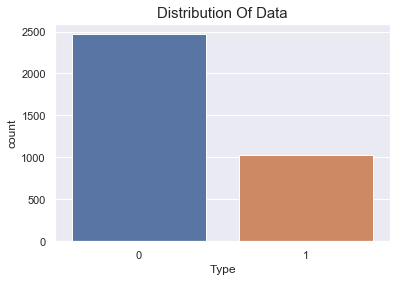

In [121]:
# plots the barplot of distribution of data
sns.set(style="darkgrid")
ax = sns.countplot(x="Type", data = trainingData)
plt.title('Distribution Of Data', fontsize = 15)


<b>Observation</b> Clearly the count of ham data which is 2468 is comparitively more than spam data of 1027. This could create
biasness and could influence in the performance of model. So, have to take care while metric selection in the model building part. 

To visualise the top-20 most frequently used words in spam and non-spam emails:

In [122]:
from collections import Counter
hamWords = []
spamWords =[]
#Stores the ham and spam messages in a list 'hamList' and 'spamList' respectively 
hamList, spamList = trainingData.groupby('Type')['Messages'].apply(lambda x: list(x))[0],trainingData.groupby('Type')['Messages'].apply(lambda x: list(x))[1]

hamWords = [w for sen in hamList for w in sen.split()] #splits the each word in a hamList and store in hamWords
hamCount = Counter(hamWords) #Counts the occurance of each word in 'hamWords' list

#top twenty most used ham words are stored in topTwentyHamCount 
topTwentyHamCount = hamCount.most_common(20)


spamWords = [w for sen in spamList for w in sen.split()] #splits the each word in a spamList and store in spamWords
spamCount = Counter(spamWords) #Counts the occurance of each word in 'spamWords' list

#top twenty most used spam words are stored in topTwentySpamCount 
topTwentySpamCount = spamCount.most_common(20)


#Displays the top 20 frequently used words in Spam and Ham Emails
print("The top 20 most frequently used words in Spam are:\n",topTwentySpamCount,"\n\nThe top 20 most frequently used words in Ham emails are:\n",topTwentyHamCount)


The top 20 most frequently used words in Spam are:
 [('subject', 1138), ('http', 683), ('company', 577), ('statements', 417), ('nbsp', 391), ('information', 389), ('font', 389), ('price', 357), ('email', 348), ('please', 336), ('pills', 291), ('time', 271), ('within', 267), ('height', 251), ('stock', 235), ('report', 223), ('securities', 222), ('investment', 219), ('size', 218), ('looking', 217)] 

The top 20 most frequently used words in Ham emails are:
 [('enron', 4757), ('subject', 4354), ('please', 1885), ('deal', 1812), ('meter', 1689), ('daren', 1255), ('thanks', 1233), ('corp', 1225), ('know', 982), ('mmbtu', 955), ('forwarded', 902), ('need', 841), ('farmer', 769), ('attached', 747), ('robert', 616), ('contract', 601), ('would', 599), ('sitara', 587), ('volume', 562), ('volumes', 559)]


Text(0.5, 1.0, 'Ham top 20 words')

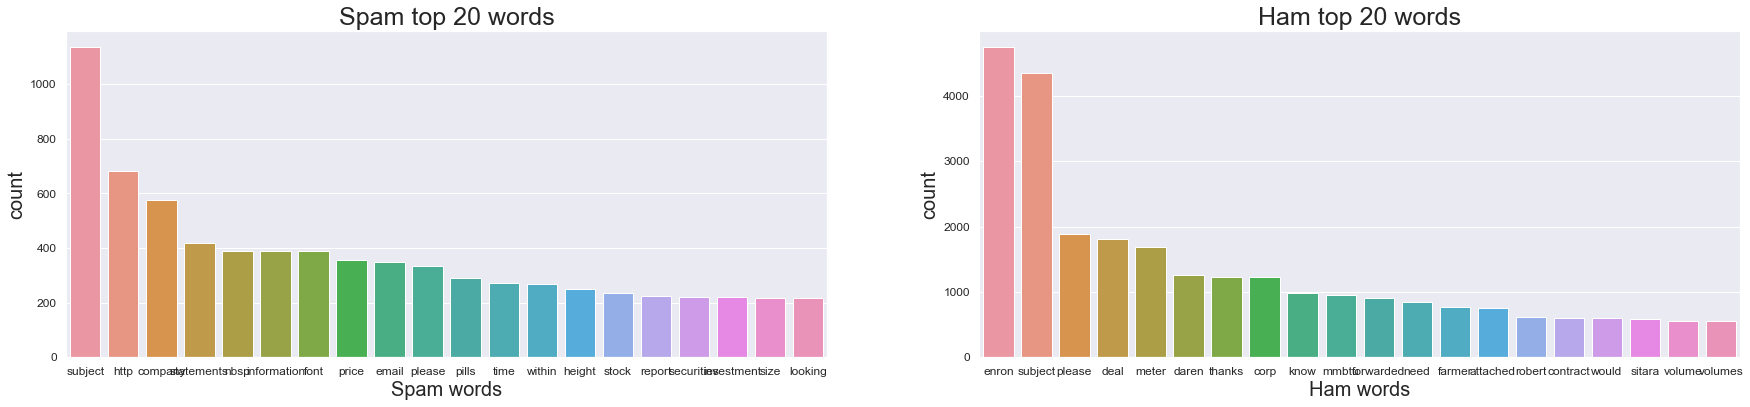

In [123]:
#Convert list of tuples to dataframe and set column names and indexes
df_topTwentyHamCount = pd.DataFrame(topTwentyHamCount, columns = ['Ham Words' , 'Frequency']) 

#Convert list of tuples to dataframe and set column names and indexes
df_topTwentySpamCount = pd.DataFrame(topTwentySpamCount, columns = ['Spam Words' , 'Frequency']) 

#plots the barplot to display the top 20 words used in spam mails 
fig, (ax,ax1) = plt.subplots(1,2,figsize = (30, 6))
sns.barplot(x = df_topTwentySpamCount['Spam Words'], y = df_topTwentySpamCount['Frequency'], ax = ax)
ax.set_ylabel('count', fontsize = 20)
ax.set_xlabel('Spam words',fontsize = 20)
ax.tick_params(labelsize=12)
ax.set_title('Spam top 20 words', fontsize = 25)

#plots the barplot to display the top 20 words used in ham mails 
sns.barplot(x = df_topTwentyHamCount['Ham Words'], y = df_topTwentyHamCount['Frequency'], ax = ax1)
ax1.set_ylabel('count', fontsize = 20)
ax1.set_xlabel('Ham words',fontsize = 20)
ax1.tick_params(labelsize=12)
ax1.set_title('Ham top 20 words', fontsize = 25)


#### Most common words in Spam
The most spam texts want the recievers to reach back to them. So, most of the words in Spam could lead to the fraud texts.Some of such words are observed in Spam emails are 'company', 'information', 'price', 'free', 'money' and so on.

#### Most common words in Ham
Many words in ham words list are such as "please", "know" and "would". This is reasonable in a conversation between two people who know each other. Also, here words like "day", "forwarded" and "attached" which indicates that the texts are used to arrange a meeting or has some important file attached.

To visualise the email length distribution in spam and ham mails

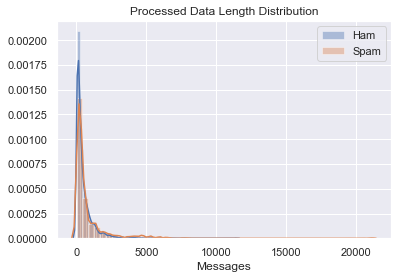

In [124]:
#Density Plot of Distribution of length Of Cleaned Data of Spam and Ham Emails 

s1 = trainingData[trainingData['Type'] == 0]['Messages'].str.len()
sns.distplot(s1, label='Ham')
s2 = trainingData[trainingData['Type'] == 1]['Messages'].str.len()
sns.distplot(s2, label='Spam')
plt.title('Processed Data Length Distribution')
plt.legend()


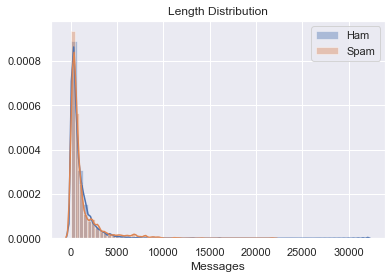

In [125]:
#Density Plot of Distribution of length Of Raw Data of Spam and Ham Emails 

s1 = df_all_mail[df_all_mail['Type'] == 0]['Messages'].str.len()
sns.distplot(s1, label='Ham')
s2 = df_all_mail[df_all_mail['Type'] == 1]['Messages'].str.replace('\d+', ' ').str.len()
sns.distplot(s2, label='Spam')
plt.title('Length Distribution')
plt.legend()

Text(0.5, 1.0, 'Distribution Of Processed Data Email Length')

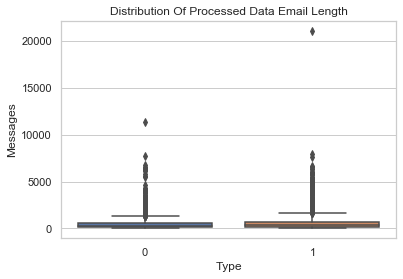

In [126]:
#Boxplot of Distribution of length Of Processed Data of Spam and Ham Emails 
msgLen = trainingData['Messages'].str.len()
sns.set_style("whitegrid") 
sns.boxplot(x = 'Type', y = msgLen, data = trainingData) 
plt.title('Distribution Of Processed Data Email Length')



Text(0.5, 1.0, 'Distribution Of Email Length')

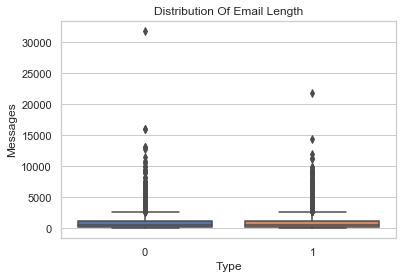

In [127]:
#Boxplot of Distribution of length Of Raw Data of Spam and Ham Emails 
msgLen = df_all_mail['Messages'].str.len()
sns.set_style("whitegrid") 
sns.boxplot(x = 'Type', y = msgLen, data = df_all_mail) 
plt.title('Distribution Of Email Length')

<b>OBSERVATION:</b> 
The above four plots are distributions of spam and ham text before and after precessing. The precessing including removing punctuations and stopwords in English means cleaned Text. <br/>
1. After processing, both spam and ham text are shorter than original length. <br/>
2. For Non-Processed Data, the density of email length of Spam data is more than of Ham Text Data. Albiet, the length distribution in Ham Text Data is more denser than Spam for processed Data.<br/>
3. Also, the mean and median of spam text is longer than ham text. This is because usually the spam text include a lot of introduction sentence.

### WordCloud

In [128]:
from wordcloud import WordCloud, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

### SUPERVISED CLASSIFICATION & MODEL SELECTION

Message column is text data. Hence, contains lot of words. And our system understands numbers.
Therefore, we will convert our text data into numeric data such that does not looses much of the information.
There are 2 ways i.e. bag of words which gives number to each word which is not much convenient.
So, here we are using Count Vectorization and TF-IDF Techniques.

### Count Vectorization
Count Vectorization involves counting the number of occurrences each words appears in a document. This could be implemented by using Python’s Sci-kit learn library which has a tool called CountVectorizer. 

In [129]:
#CountVectorization

cv = CountVectorizer()

#applying count vectorization encoding to the trainset, testset and message column  
msg_traincv = cv.fit_transform(msg_train)
msg_testcv=cv.transform(msg_test)
features_cv = cv.fit_transform(df_msg1)


#### Cross Validation

Here, using k-fold cross validation.
As this dataset is imbalanced and cross_val_score function does not have attribute to shuffle the data. So, manually have added a line of code to shuffle the dataset before cross-validation.
<br>While evaluating cross_val_score using scoring as 'f1' because F1-score metric is weighted average of Precision and recall.

In [130]:
#setting n_fold parameter to 5
n_folds = 5

#creates the function to return the model's cross validation scores 
def f1_cv1(model):
    kf = KFold(n_folds, shuffle = True, random_state = 29).get_n_splits(features_cv)
    f1 = cross_val_score(model, features_cv, df_type, scoring = 'f1', cv = kf )
    return (f1)

svc = SVC(kernel = 'sigmoid', gamma = 1.0)
rfc = RandomForestClassifier(n_estimators = 31, random_state = 32)
mnb = MultinomialNB(alpha = .2)

In [131]:
#displays the cross validation score for model using 'SVC Algorithm'
score1 = f1_cv1(svc)
print ('\nSVC score: {:4f}({:4f})\n'.format(score1.mean(), score1.std()))


SVC score: 0.741956(0.010333)



In [132]:
#displays the cross validation score for model using 'Random Forest'
score1 = f1_cv1(rfc)
print ('\nRandomForest score: {:4f}({:4f})\n'.format(score1.mean(), score1.std()))


RandomForest score: 0.953906(0.004613)



In [133]:
#displays the cross validation score for model using 'MultinomialNB'
score1 = f1_cv1(mnb)
print ('\nMultinomial NB score: {:4f}({:4f})\n'.format(score1.mean(), score1.std()))


Multinomial NB score: 0.968132(0.003910)



<b>Observation:</b> It seems that Multinomial NB and Random Forest performs best with F1-score around 96.8% and 95.39% of f1 score mean value . <br><br>Now will evaluate on how they perform in terms of <b>Accuracy</b>:

In [134]:
#creates function to fit the model on training set
def classifier(clf, msg_train, type_train):
    clf.fit(msg_train, type_train)
    
#creates the function which returns the prediction values on the test set
def predictor(clf, msg_test):
    return (clf.predict(msg_test))    

In [135]:
clf = {'SVC':svc, 'RandomForest':rfc,  'MultinomialNB': mnb}

In [136]:
preds_cv = []
#stores and fits the different model algorithm to make predictions on test set
for key,value in clf.items():
    classifier(value,  msg_traincv, type_train)
    pred = predictor(value,msg_testcv)
    preds_cv.append((key, accuracy_score(type_test,pred)))

In [137]:
#displays the model with their accuracies
preds_cv

[('SVC', 0.8432288192128086),
 ('RandomForest', 0.9679786524349566),
 ('MultinomialNB', 0.9759839893262174)]

### TF-IDF VECTORIZER(Term frequency-Inverse distribution frequency)
It reduces the weightage to the words which are frequently used and increases the weightage which actually influences the data.
The term frequency refers to how much a term (i.e. a word) appears in a document while Inverse document frequency refers to how common or rare a term appears in a document.

In [138]:
cv1 = TfidfVectorizer(min_df=1,stop_words='english')

#applying TF-IDF encoding to the trainset, testset and message column  
features = cv1.fit_transform(df_msg1)
msg_traincv1 = cv1.fit_transform(msg_train)
msg_testcv1 = cv1.transform(msg_test)


#### Cross Validation

Here, using k-fold cross validation.
As this dataset is imbalanced and cross_val_score function does not have attribute to shuffle the data. So, manually have added a line of code to shuffle the dataset before cross-validation.
<br>While evaluating cross_val_score using scoring as 'f1' because F1-score metric is weighted average of Precision and recall.


In [139]:
#setting n_fold parameter to 5
n_folds = 5
#creates the function to return the model's cross validation scores 
def f1_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 29).get_n_splits(features)
    f1 = cross_val_score(model, features, df_type, scoring = 'f1', cv = kf )
    return (f1)

In [140]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
rfc = RandomForestClassifier(n_estimators = 31, random_state = 32)
mnb = MultinomialNB(alpha = .2)

In [141]:
#displays the cross validation score for model using 'SVC Algorithm'
score = f1_cv(svc)
print ('\nSVC score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


SVC score: 0.980768(0.003607)



In [142]:
#displays the cross validation score for model using 'Random Forest'
score = f1_cv(rfc)
print ('\nRandomForest score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


RandomForest score: 0.946863(0.003964)



In [143]:
#displays the cross validation score for model using 'MultinomialNB'
score = f1_cv(mnb)
print ('\nMultinomial NB score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


Multinomial NB score: 0.964687(0.007553)



<b>OBSERVATION</b> It seems that SVC and Multinomial NB perform best with F1-score around 0.98 and 0.96. <br><br>Now will evaluate on how they perform in terms of <b>Accuracy</b>:

In [144]:
#creates function to fit the model on training set
def classifier(clf, msg_train, type_train):
    clf.fit(msg_train, type_train)

#creates the function which returns the prediction values on the test set
def predictor(clf, msg_test):
    return (clf.predict(msg_test))

In [145]:
clf = {'SVC':svc, 'RandomForest':rfc,  'MultinomialNB': mnb}
preds = []
#stores and fits the different model algorithm to make predictions on test set
for key,value in clf.items():
    classifier(value,  msg_traincv1, type_train)
    pred = predictor(value,msg_testcv1)
    preds.append((key, accuracy_score(type_test,pred)))

In [146]:
#displays the model with their accuracies
preds

[('SVC', 0.9839893262174784),
 ('RandomForest', 0.9646430953969313),
 ('MultinomialNB', 0.9739826551034023)]

Text(0.5, 1.0, 'Models Performance for TF-IDF')

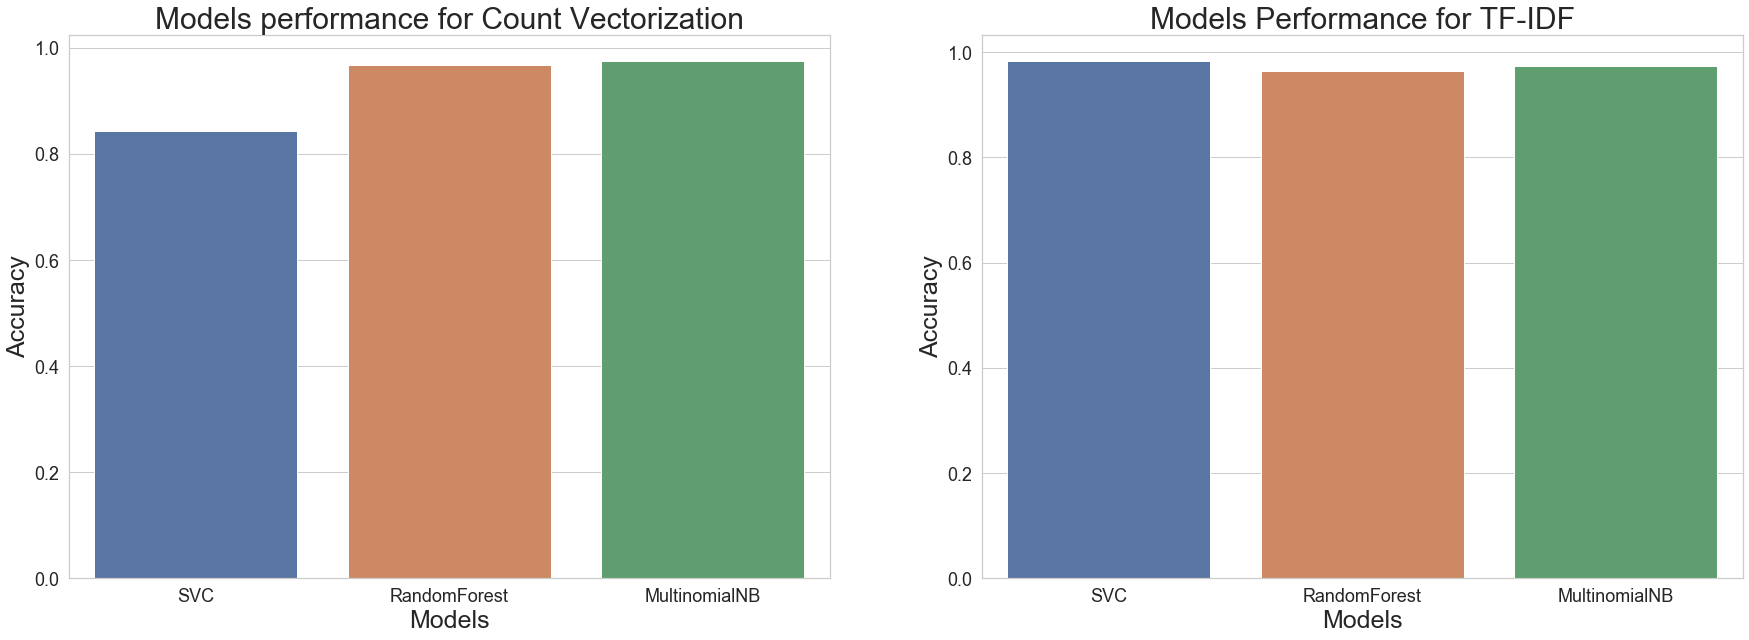

In [147]:
#Convert list of tuples to dataframe and set column names and indexes
df_accuracyCV = pd.DataFrame(preds_cv, columns = ['Model', 'Accuracy'])

#Convert list of tuples to dataframe and set column names and indexes
df_accuracyTFIDF = pd.DataFrame(preds, columns = ['Model', 'Accuracy'])

#plots the barplot to display the Models performance for Count Vectorization 
fig, (ax,ax1) = plt.subplots(1,2,figsize = (30, 10))
sns.barplot(x = df_accuracyCV['Model'], y = df_accuracyCV['Accuracy'], ax = ax)
ax.set_ylabel('Accuracy', fontsize = 25)
ax.set_xlabel('Models',fontsize = 25)
ax.tick_params(labelsize=18)
ax.set_title('Models performance for Count Vectorization', fontsize = 30)

#plots the barplot to display the Models Performance for TF-IDF
sns.barplot(x = df_accuracyTFIDF['Model'], y = df_accuracyTFIDF['Accuracy'], ax = ax1)
ax1.set_ylabel('Accuracy', fontsize = 25)
ax1.set_xlabel('Models',fontsize = 25)
ax1.tick_params(labelsize=18)
ax1.set_title('Models Performance for TF-IDF', fontsize = 30)


For Count Vectorization Technique, Multinomial Algorithm is giving the best result with good Accuracy of 97% and mean F1 score of 96% comparing to other models i.e. SVC and Random Forest.<br/>
However, for TF-IDF Technique, the SVC algorithm outperforms and gives the best result with 98% Accuracy and F1 score of 98%.<br/>
But, MultinomialNB model performs good for both Count Vectorization anf TF-IDF Technique.<br/>
<b>So, we will select the MultinomialNB algorithm using TF-IDF Technique the most effective model for evaluation. </b>

Here, have used 3 different classifiers which are 'Random Forest', 'Support Vector Machine(SVM)' and 'Multinomial Naive Bayes' algorithms to build and compare models.<br/><br/>
<b>1) Random Forest </b> - Random Forest is developed by aggregating trees. It takes different random subsets of the training dataset and then builds the different decision trees with each subset. Thus, aggregates the each decision tree prediction or say vote to get the final and better result. Random Forest avoids overfitting, easy to deal with large number of features and helps with feature selection based on importance. It also removes the biasness as choosing random dataset will let us help to use the whole problem set. <br/><br/>
<b>2) Support Vector Machine(SVM) </b>- SVM is also known as Discriminative classifier. This algorithm can be used for both classification and regression problems but gives better result for classification problem.<br/>
It includes 3 key points which are Support Vectors, Hyperplane and margin.<br/>
Support Vectors are the closest datapoints to the hyperplane, Hyperplane is a decision 
plane which seperates different classes datapoint and Margin is calculated as the perpendicular
distance from the line to support vectors. If the margin is larger in between the classes
then it is considered as good margin else it is considered as bad margin.<br/>
Generally, SVM constructs the hyperplane to seperate different classes.  <br/><br/>
<b>3) Multinomial Naive Bayes </b>- It is a probabilistic machine learning algorithm.<br/>This algorithm works on Bayes Theorem.
Bayes Theorem is a mathematical theorem where we use existing data to predict
 what the outcome of a certain event will be for a given set of conditions.
In Naive Bayes, we take two assumptions. First that each feature should be independent to each
other and second is that each feature is equally contributing to form output.
When the distribution is generated by Multinomial Distribution, than uses Multinomial 
Naive Bayes Classifer.


### MODEL EVALUATION

First, evaluate the model by tuning the 'n_fold' parameter: 

In [148]:
#setting n_fold parameter to 5
n_folds = 5

score = f1_cv(mnb)
print ('\nMultinomial NB score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


Multinomial NB score: 0.964687(0.007553)



In [149]:
#setting n_fold parameter to 10
n_folds = 10
score = f1_cv(mnb)
print ('\nMultinomial NB score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


Multinomial NB score: 0.967265(0.010648)



In [150]:
#setting n_fold parameter to 20
n_folds = 20
score = f1_cv(mnb)
print ('\nMultinomial NB score: {:4f}({:4f})\n'.format(score.mean(), score.std()))


Multinomial NB score: 0.967945(0.015968)



<b>NOTE:</b> Model for n_fold = 5 gives the best result with good F1 score mean value an less standard deviation. However, on increasing the n_fold number, it is observed there is not much difference in the mean value but increases the standard deviation.



Now, evaluating the model by plotting graph plots which includes <b>Validation Curve and Learning Curve.</b><br/> 
A validation curve plots the score over a varying hyper parameter, while a learning curve plots the score over varying numbers of training samples.


#### VALIDATION CURVE PLOT
Validation Curve visualises the perfrmance metric over a range of values for some hyperparameters.This helps to evaluate how the hyperparameters control the complexity of model.
The model must be complex enough to capture relevant information in th training data. However, too complex model can lead to overfitting which should be avoided.
Below is the validation curve over a multinomial Naive Bayes alpha parameter.

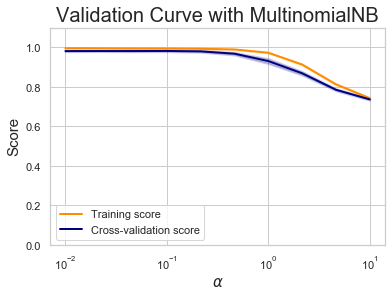

In [151]:
# Plotting Validation Curve

estimator = MultinomialNB()

# Create range of values for parameter
param_range = np.logspace(-2, 1, 10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    estimator,features,df_type, param_name="alpha", param_range=param_range,
    scoring="accuracy", cv=5)


# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


lw = 2
# Plot mean accuracy scores and accuracy bands for training and test sets 
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

# Create plot
plt.title("Validation Curve with MultinomialNB", fontsize = 20)
plt.xlabel(r"$\alpha$", fontsize = 15)
plt.ylabel("Score", fontsize = 15)
plt.ylim(0.0, 1.1)
plt.legend(loc="best")
plt.show()

#### LEARNING CURVE PLOT
It plots the models performance on thr training and unseen data as a function of the training set size.
This curve helps to evaluate if the model suffers from high variance or high biasness.<br/>
If the performance of the model on the training and cross validation set are similar i.e both set exhibit a poor accuracy than it leads to <b>High Biasness</b>.<br/>
If there is relatively large gap between CV and training accuracy than it strongly indicates <b>High Variance</b>(where the training accuracy is high but unseen accuracy significantly lower).


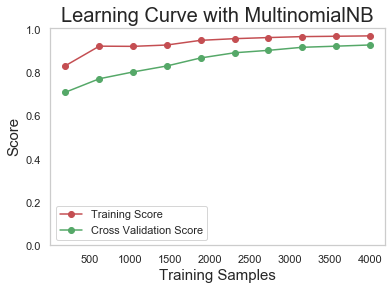

In [152]:
# Plotting Learning Curve

estimator = MultinomialNB()

# Create range of values for parameter
train_sizes= np.linspace(.05, 1.0, 10)

# Calculate accuracy on training and test set using range of parameter values
train_sizes, train_scores, test_scores = learning_curve(estimator,features,df_type,
                                                        train_sizes=train_sizes, cv = 5)

# Calculate mean for training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.grid()

# Plot mean accuracy scores for training and test sets 
plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training Score")
plt.plot(train_sizes, test_scores_mean,'o-', color = "g", label = "Cross Validation Score")

# Create plot
title = "Learning Curve with MultinomialNB" 
plt.title(title, fontsize = 20)
ylim= (0.0,1.01)
plt.ylim(ylim)
plt.xlabel("Training Samples", fontsize = 15)
plt.ylabel("Score", fontsize = 15)
plt.legend(loc="best")
plt.show()

<b>OBSERVATION:</b> The Learning Curve Graph shows the good bias-variance trade off. Here, the accuracy on the training and validation data tend to converge and also plateaux.